In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pylab import plot,show,hist
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist
#%config InlineBackend.figure_format = 'svg' для большей четкости графиков
matplotlib.style.use('ggplot')
%matplotlib inline

#Стандартизация данных
from sklearn import preprocessing

#Для построения диаграмм рассеивания
from pandas.plotting import scatter_matrix

#Иерархический кластерный анализ
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Кластерный анализ методом К-средних
from sklearn.cluster import KMeans

os.chdir(r'C:\Users\Mr Alex\Documents\GitHub\FlightPreparence')
data = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
town = pd.read_csv('town_1959_2.csv', header = 0,)
df = pd.read_csv('swiss_bank_notes.csv', index_col=0)
beer = pd.read_csv('beverage_r.csv', sep=";", index_col='numb.obs')
food = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
ass = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
albi = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')

In [ ]:
#Классификация - приписание объекта к классу из-за значения ключевой (группирующей) переменной
#Типы переменных. Количественные(непрерывные, дискретные). Номинальные (несравниваемые). Ранговые (порядковые)
#Гистограмма частот - форма распределения количественного признака
#Описательная статистика. Меры центральной тенденции. Меры изменчивости
#МЦТ. Мода - самый частый признак. Медиана - делит упорядоченное множество пополам. Среднее значение
#МИ. Размах - Xmax-Xmin. 
#Дисперсия D - средний квадрат отклонений индивидуальных значений от средней величины. С ростом n, дисперсия сокращается
#D = сумма(Xинд - Xсред)**2/n-1. Хсред генеральной совокупности обозначается как мю, М
#Стандартное отклонение, "сигма", sd = D**0.5

In [ ]:
#Нормальное распределение. Унимодально и симметрично 
#Центральная предельная теорема. Для выборок стандартная ошибка среднего se=SDинд/n**0.5, где n - число элементов выборки
#Если n выборка репрезентативная и число элементов > 30, то se=0.5
#Интервал для поиска М генеральной совокупности(доверительный интервал): для 95% выборок Хсред ± 1.96*se включат в себя М

In [ ]:
#Число наблюдений(N1), попавших в столбец. H = C*N1 
#H = N1/(N*длина интервала) - в таком случае гистограмма будет вероятностной, то есть в пределах единицы
#Плотность распределения f(x) позволяет рассчитать вероятность P(A) попаданий в определенный интервал
#Математическое ожидание EX - среднее арифметическое
#В гистограмме наибольший вес имеет площадь столбца
data['SalePrice'].hist(bins=60)

In [ ]:
#Гистограмма нужна чтобы оценить одну группу
#Вероятностная гистограмма 
data['SalePrice'].hist(density=True, bins=60)

In [ ]:
#Ядерная оценка плотности Скотта-Сильвермана - обобщение гистограммы F(t) = (1/n*h)*сумма всех наблюдений K(t-Xi/h)
#Распределение Японечникова определяет плотность К - симметричная, неотрицательная, с интегралом=1
my_density = gaussian_kde(data['SalePrice'], bw_method = 1) #Метод определяет меру сглаживания
x = linspace(min(data['SalePrice']), max(data['SalePrice']),1000)
plot(x, my_density(x),'g') #распределение функции
hist(data['SalePrice'], density=True, alpha=.3) 
show()

In [ ]:
#Для сравнения нескольких групп можно сложить гистограммы 
df.groupby('Status')['Length'].plot.hist(alpha=.6)
plt.legend()
#Но лучше использовать box-plot. Усы - 1,5 межквартиля. Outlies - 3. Extremes - дальше.
#Внимательно смотрим на число наблюдений в каждой из выборок, чтобы проанализировать boxplot
data['MS Zoning'].value_counts()
ax=data.boxplot(column='SalePrice', by='MS Zoning')
ax.get_figure().suptitle('')

In [ ]:
#Для определения "типичного" объекта совокупности можно использовать среднее(если нет выбросов) или медиану(если есть)
#При неравномерном распределении можно убрать выбросы
town_2 = town.iloc[2:1004]
#Или логарифмировать переменную (для лог-нормального распределения)
x = np.log10(town[u'население'])
pd.Series(x).hist(bins=45)
#Усеченное среднее. Выбрасывается 2,5% самых малых и 2,5% наибольших значений переменной. Для новой БД считается среднее
exclude = int(len(town)/100*2.5)
redacted_town = town[exclude:len(town)-exclude]

In [ ]:
#Для получения комплексного сравнения объектов по нескольким переменным
#Диагональ показывает ядерную оценку плотности
#Матрица состоит из диаграмм рассеивания
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(6, 6),
               # плотность вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.2,
              )

In [ ]:
#В случае очевидного смешения двух нормальных распределений, можно оценить их более подробно
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left')

#Для сравнения параметров важно их нормализовать
data.groupby('MS Zoning')['SalePrice'].plot.hist(density=True)
plt.legend()

#Если рассевание нельзя разделить линейно, то меняем точку начала координат и выбираем новые параметры для разделения

In [ ]:
#Иерархический кластерный анализ разделяет объекты на группы (стратификация). Число групп заранее неизвестно
#Кластерный анализ позволяет сократить число наблюдений и проинтерпретировать их
#Схожесть внутри кластера отображается как расстоянием между близкими объектами на диаграмме кластеров
#Расстояние можно рассчитать методами: Евклида(или квадрата Евклида), Блок(Манхеттен), Хэмминга(для слов) и тд.
#Манхеттен предпочтительнее, когда нет больших различий в рандомных переменных, потому что вес аномалий тогда меньше
#Расстояние между кластерами рассчитывается:
#Метод Варда (WARD) - позволяет работать с шаровыми скоплениями
#Метод ближайших соседей (позволяет определять ленточные кластеры)
#Средневзвешенное расстояние: среднее для суммы всех расстояний (также для ленточных)
#Центроид: расстояние между кластерами равно расстоянию между их центрами тяжести
#Методы дальнего и ближайшего соседа: расстояние между самыми дальними\близкими объектами есть межкластер
#Метод расстояния Sorencen-Dice Q = 2*|A^B|/|A|+|B|. Не работает если множества слабо пересекаются

In [ ]:
#Алгоритмы кластерного анализа. Объекты группируются с ближайшими, пока нет скачка в расстояниях для следующего слияния
#Момент для прекращения слияния определяется дендрограммой (для умеренного числа объектов)
#Каменистая осыпь/локоть показывают скачок (резкий взлет графика) шагов объединений, когда кластеризуются тысячи объектов
#Задача аналитика: отобрать переменные, выбрать метод стандартизации, установить расстояние между кластерами и между объектами 

In [ ]:
# Объект, в котором будет хранится информация о последовательном слиянии кластеров
#Для функции нужен фрейм, метод межкластера и метод межобъектов
link = linkage(beer, 'ward', 'euclidean')

In [ ]:
#link - матрица (n-1) x 4, где n - число наблюдений. 
#Каждая строка - результат слияния очередной пары кластеров с номерами link[i, 0] и link[i, 1]. 
#Новому кластеру присваивается номер n + i 
#link[i, 2] означает расстояние между слитыми кластерами, а link[i, 3] - размер нового кластера.
link[:5]

In [ ]:
#Построение дендрограммы
dn = dendrogram(link, orientation='right')

In [ ]:
#Ключевые характеристики кластеров
#В колонку cluster запишем номер кластера, в которую попал объект с помощью функции fcluster. 
#Аргументы: linkage, пороговое значение для межкластера (либо число кластеров), criterion: distance для остановки разбиения 
# Останавливаем объединение, если расстояние между кластерами превышает 3
beer['cluster'] = fcluster(link, 3, criterion='distance')
#Доля объектов в кластере, которые имеют соответствующие характеристики
beer.groupby("cluster").mean()

In [ ]:
#Кластерный анализ методом К-средних
#инициализация модели
model = KMeans(n_clusters=2, random_state=42) #random_state - зерно датчика случайных чисел 
#При каждом новом вызове с одинаковыми random_state модель будет давать одинаковые результаты

In [ ]:
#подгонка модели по данным из БД
model.fit(beer)

#Результат кластеризации на данных из БД
model.labels_

#координаты центров кластеров
model.cluster_centers_

#Добавление в кластер данных. Предсказание для новых наблюдений. Метод predict
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

In [ ]:
#Число кластеров можно определить через график локтя для для разного числа кластеров
#Метод inertia_ вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера 
#Кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(beer) for k in K]
dist = [model.inertia_ for model in models]

#График локтя
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del ass['NR']

#Оптимизируем модель, меняя число задаваемых кластеров на основании графика локтя
model = KMeans(n_clusters=4, random_state=42)
model.fit(ass)
ass['cluster'] = model.labels_
ass.groupby('cluster').mean()

#Смотрим к какому кластеру какие объекты относятся
ass['cluster'].sort_values()

In [ ]:
#Проверка статистических гипотез:
#Гипотеза согласия. Совпадает рандомная функция распределения с нормальным распределением? Самый дешевый и простой вариант
#Гипотеза согласия2. Гипотеза об экспоненциальности распределения. Нужна, когда есть переменная времени ожидания
#Гипотеза однородности. Совпадают две рандомные функции распредления? Например, чтобы сравнить данные до и после события
#Гипотеза независимости. Нулевая гипотеза для рандомных объектов. Проверяется через коэффициент корреляции (скаляры) 
#Гипотеза о параметре распределения. Определение ключевых параметров. Например одинаковые средние или медианы.

In [ ]:
#Альфа-это уровень значимости(0.05, 0.01. 0.005). Определеяет число ошибок первого рода. На второго рода влияет размер выборки
#Т- это статистика критерия. Если T<Cальфа, то верна нулевая гипотеза
#Cальфа- это критическое значение. Вероятность отвергнуть правильную гипотезу(T>C) не должна превышать А(альфа)
#p-value показывает насколько часто статистика критерия в верной гипотезе будет превышать реальные значения p=P{T>Tэксп}
#Если p<A, гипотезу отвергаем. Если p>A, гипотезу не отвергаем. Проверяются все условия, при которых критерий будет работать

In [ ]:
#Тесты Колмогорова-Смирнова и Shapiro-Wilk позволяют проверить выборку на принадлежность к ГС и нормальность распредеелния

#Применяем критерий Шапиро-Вилка после логарифмирования. 
town = town.set_index(u'номер')
plt.hist(np.log10(town[u'население']), bins=50)
res = stats.shapiro(np.log10(town[u'население']))
print('p-value: ', res[1])
#P очень маленькое, поэтому гипотезу о нормальности отвергаем. 
#Отклонения от нормальности будут несущественны, если убрать выбросы

In [ ]:
#Распределение Стьюдента (t-distribution) для n<30 - более высокие хвосты распределений.Число степеней свободы df=n-1
#t заменяет Z в распределении Стьюдента. t=(Xинд-M)/(sd/n**0.5)
#Помимо средних также нужно сравнить дисперсии D (тест Флигнера-Килина) и медианы (много n - тест Муда, мало n - Манн-Витни) 

In [ ]:
#Парный t-критерий Стьюдента.  X1сред - Х2сред = А , se=((sd1**2/n1)+(sd2**2/n2))**0.5 , df=n1+n2-2
#При t = A/se и df можно рассчитать p при котором M1-M2=0. То есть разницы между выборками почти нет
#Q-Q Plot показывает насколько выборочные значения соответствуют предсказанным(из нормального распределеня)

p-value: 0.40220407862126695


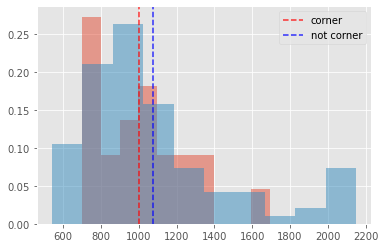

In [5]:
#U-критерий Манна-Витни переводит значения в ранговую шкалу и проверяет НЕ равенство медиан. P{X>Y}=P{X<Y}

#Ищем зависимость цены от переменной COR=1 и 0. Чтобы применить Стьюдента, проверим нормальность данных и равенство дисперсий
#Заменяем -9999 (здесь=пустое) на корректное пустое значение.
albi = albi.replace(-9999, np.nan)
#Сохраним в отдельные переменные выборки, которые собираемся сравнивать.
x = albi[albi['COR'] == 1]['PRICE']
y = albi[albi['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'

def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])
    

two_histograms(x, y)

#Выбросы не дают применить Стюдента. Потому непараметрические критерий Манна-Витни.
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])
#p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. разница медиан в выборках случайна.

In [ ]:
#Корреляция. Scatter-plot или диагратта рассеивания
#Сила и направление взаимосвязи определяется ковариацией. cov=Сумма((Xi-Xсред)*(Yi-Yсред))/N-1
#Коэффициент корреляции Пирсона находится в промежутке [-1; 1] и считается как Rxy=cov/SDx*SDy
#Коэффициент детерминации r**2 показывает влияние дисперсии одной переменной на другую в промежутке [0; 1]
#Коэффициент Спирмена позволяет блокировать выбросы через ранги. d=X-Y. Rs=1-6*сумма d**2/N(N**2-1)
#Часто корреляция обусловлена скрытой переменной

In [ ]:
albi.head()

In [ ]:
#Стандартизация позволяет сделать вес важных переменных соизмеримым. Min=0(-1), max=1. ИЛИ Z
#Z-Стандартизация: преобразование в тип, где М=0, sd = 1. Правило одной, двух и трех "сигм"
#Z=(Xинд-М)/sd Пример: по таблице Z, где Хсред=150, sd=8, превышать Xинд будет 0.5z или 30%
#Z=(Xсред-M)/se =(18,5-20)/0.5 = -3. Вероятность получить такой результат p = 0.0027

#Если в БД нет единой метрики, то стандартизируем данные
norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)

In [ ]:
#Дисперсионный анализ. Если межгрупповой показатель изменчивости сильно превышает внутригрупповой, то средние разнятся
#SST - общая сумма квадратов показывает общую изменчивость данных. Сумма(Xинд-Xсред)**2  SST = SSW+SSB
#SSW - сумма квадратов внутригрупповая. Сумма(X1инд-Х1сред)**2 + ...(XNинд-ХNсред)**2
#SSB - сумма квадратов межгрупповая. SSB= n(X1сред - Хсред)**2 + ...n(XNсред-Хсред)**2
#Распределение Фишера, F-значение. F=(ssb/n-1)/(ssw/N-n). При верности нулевой гипотезы значения F очень маленькие
#Поправка Бонферрони на множественную проверку гипотез. a = ai/n  НО: мешает получить значимые уровни различия
#FDR или критерий Тьюки считает p-уровень для сравниваемых пар Xтэ=Xa-Xб
#Двухакторный дисперсионный анализ SStotal=SSW+SSBa +SSBb + SSBa*SSBb
#Взаимодействие факторов в ANOVA
#Дисперсионный анализ требует нормальности распределения зависимой переменной и гомогенности дисперсии(тест Левена)

In [ ]:
#Регрессионнный анализ позволяет исследовать взаимосвязи переменных и делать линию тренда
#Простая линейная регрессия. Взаимосвязь 2-х переменных. Y-зависимая, X-независимая 
#Y=B0(intercept)+B1(slope). Зачение Y, где линия пересекает ось, угол наклона линии к оси X
#Метод наименьших квадратов(МНК) находит оптимальные параметры B0 и B1, чтобы сумма квадратов остатков (SS) была минимальна
#Y=B0+B1*X1
#B1 = SDy/SDx*Rxy, B0 = (Yсред-B1*Xсред), t = B1/se, df=N-2 Если B1 близка к нулю, то взаимосвязи почти нет
#Коэффтцтент детерминации R**2 = 1-(SSres/SStotal) доля дисперсии Y, объясняемая регрессионной моделью. Чем больше R , тем лучше
#Требования: линейная вхаимосвязь X Y, нормальное распределение остатков, гомоскедатичность(изменчивость) остатков

In [ ]:
#Логистическая регрессия позволяет исседовать взаимосвязи для зависимой переменной с двумя значениями (0,1)
#Множественная регрессия  Y= B0+B1*X1 + ... + BN*XN   Многомерный scatter-plot
#Дополнительно требует: мультиколлинеарность(без сильной корреляции или идентичности), нормальное распределение переменных.
#t-критерий показывает оказываемое влияние каждого предиктора. Если 0, то влияния нет
#Для множественной регрессии используется "Исправленный" R**2

In [ ]:
#Вычисление статистической погрешности для случайной выборки

#Расчет объема выборки
N = 40000 #Генеральная совокупность
P = 0.95 #Доверительный уровень в 95% 
Z = 1.96 #коэффициент доверительного уровня (p = 95%, Z=1,96)(p=99%,   Z=2,58)
p = 0.5 #доля респондентов с  наличием исследуемого признака,
q = (1 - p) #доля респондентов, у которых исследуемый признак отсутствует,
delta = 0.05 #Задаваемая предельная ошибка выборки.
n = (Z**2)*p*q/delta**2 #объем выборки

print("Рекомендуемый объем выборки для данной аудитории:", int(n), "человек")

In [ ]:
#Расчет ошибки выбоки для доли признака
#Случай 1. Генеральная совокупность значительно больше выборки
n = 384 #Объем выборки
m = 276 #Число объектов выборки с нужными параметрами (True)
p = m/n #Вероятность на основе практических данных
sigma = n/2*((p*(1-p)/n*(1-n/N)))**0.5 
print('Результат выборки один составит: ', \
      float("{0:.1f}".format(p*100)), "±", float("{0:.1f}".format(sigma)), "%")

#Случай 2. Генеральная совокупность сопоставима с объемом выборки
N = 2500
delta = Z*((p*q/n)*((N-n)/(N-1)))**0.5 
print("Точность результатов выборки два составит: ", "±", float("{0:.1f}".format(delta*100)), "%")

In [ ]:
#Рассчет доверительного интервала
P = 0.99 #Доверительный уровень в 99% 
Z = 2.58 #коэффициент доверительного уровня 
p = 0.2 #доля респондентов с наличием исследуемого признака,
q = (1 - p) #доля респондентов, у которых исследуемый признак отсутствует,
n = 1000 #Объем выборки

sigma = Z*(p*q/n)**0.5 #Погрешность оценки

print('Точность результатов конкретной выборки составит: ±', float("{0:.2f}".format(sigma*100)), "%")
print('Доверительный интервал составит:', float("{0:.2f}".format((p - sigma)*100)), "% ;", \
                                            float("{0:.2f}".format((p + sigma)*100)), "%")

In [ ]:
#Ненормальные распределения
#Сгладить распределение, уменьшив шкалу на основании полезности данных, удалив аномалии
#Логарифмировать переменные (не забываем про ноль в исходной переменной). Схлопывает экстремальные значения
#Логарифмирование отлично работает с ассиметричными распределениями
#Если логарифмы переменных зависимы линейно, то значит сами переменные зависят нелинейно 
#Применить непараметрический критерий (ранговое распределение)
#Преобразование Бокса-Кокса подбирает оптимальную степень для возведения в нее mathworks.com/help/finance/boxcox.html 
#Bootstrap и метод Монте-Карло. Сравнивать медиану, мин, макс, 13-процентиль, среднее

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>
